In [28]:
import gym
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
!pip install gym

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(sorted(env_ids))

['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v2', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Reacher-v2', 'Reacher-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4']


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


In [4]:
import gym
env = gym.make("Pendulum-v1").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [26]:
print("State_Space", env.observation_space)
print("Action_Space", env.action_space)

State_Space Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action_Space Box(-2.0, 2.0, (1,), float32)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import imageio

In [6]:
nb_actions = env.action_space

In [7]:
nb_obs = env.observation_space

In [8]:
from collections import deque

In [22]:
# prompt: complete the above funtion

class DQNAgent:
  def __init__(self):
    self.state_dim = 3
    self.action_dim = env.action_space.shape[0]
    self.memory = deque(maxlen=1000)
    self.gamma = 0.85
    self.epsilon = 1.0
    self.epsilon_min = 0.01
    self.epsilon_decay = 0.995
    self.learning_rate = 0.005
    self.tau = 0.125
    self.model = self.create_model()
    self.target_model = self.create_model()

  def create_model(self):
    model = Sequential()
    state_shape = env.observation_space.shape
    model.add(Dense(24, input_dim=state_shape[0], activation="relu"))
    model.add(Dense(48, activation="relu"))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(self.action_dim, activation="linear"))
    model.compile(loss="mean_squared_error", optimizer= Adam(learning_rate=self.learning_rate))
    return model


In [23]:
import torch.optim as optim

In [24]:
agent = DQNAgent()

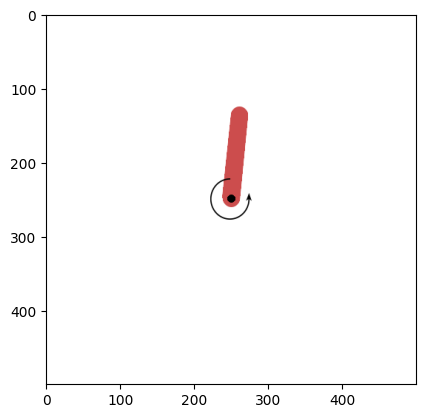

In [ ]:
import pygame
env.reset()
pygame.init()
prev_screen = env.render(mode="rgb_array")
plt.imshow(prev_screen)
for i_eps_2 in range(10001):
  action=env.reset()
  agent, reward, done, info = env.step(action)
  screen = env.render(mode="rgb_array")

  plt.imshow(screen)
  clear_output(wait=True)
  display(plt.gcf())

  if done:
    break

clear_output(wait=True)
env.close()
